In [3]:
import pandas as pd
data=pd.read_csv(r'C:\Users\ASUS\Desktop\Gomycode projects\mini projet\dataset\crop_production.csv')
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
data.count()

State_Name       246091
District_Name    246091
Crop_Year        246091
Season           246091
Crop             246091
Area             246091
Production       242361
dtype: int64

In [5]:
data.dtypes


State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [6]:
data.columns 

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [7]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
data.isnull().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production        True
dtype: bool

In [9]:
data['Production'].fillna("0",inplace=True)
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

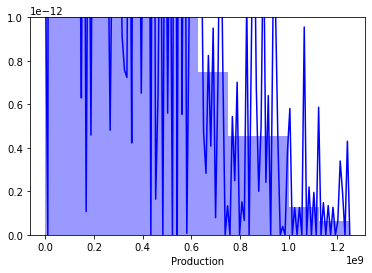

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(data["Production"],bins=10, hist= True, kde= True, color='blue')



(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

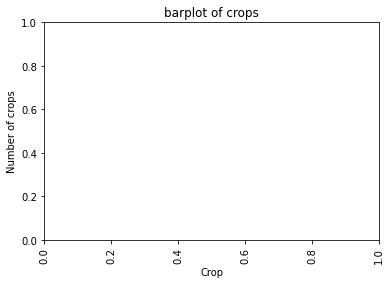

In [13]:
plt.xlabel("Crop")
plt.ylabel("Number of crops")
plt.title("barplot of crops")
crops=data["Crop"].value_counts()
plt.xticks(rotation=90)


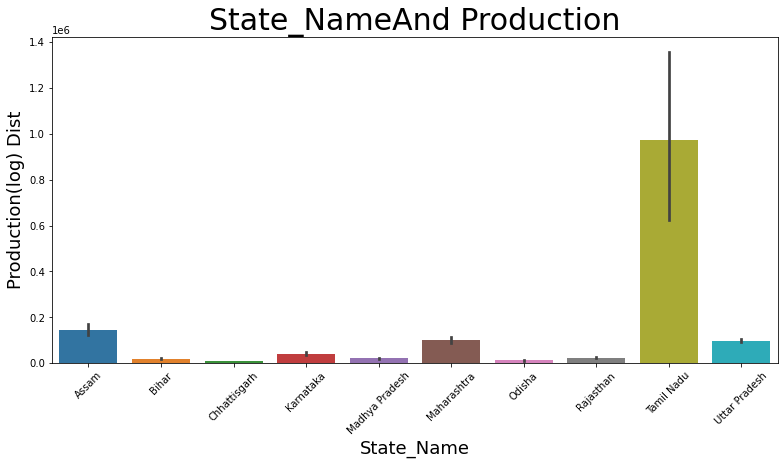

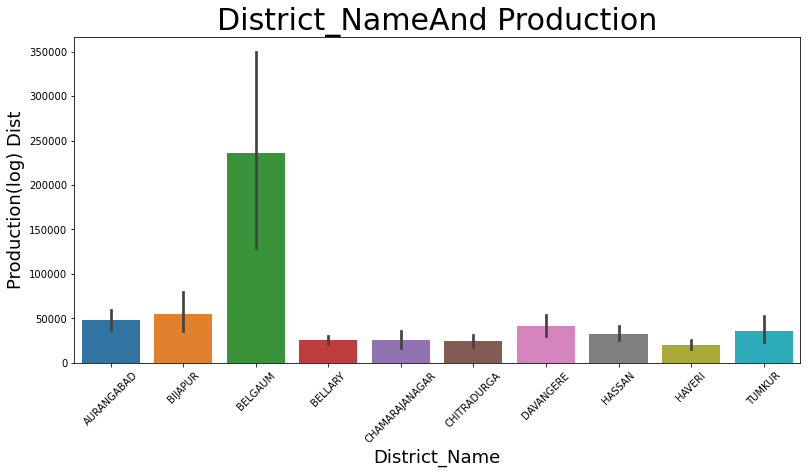

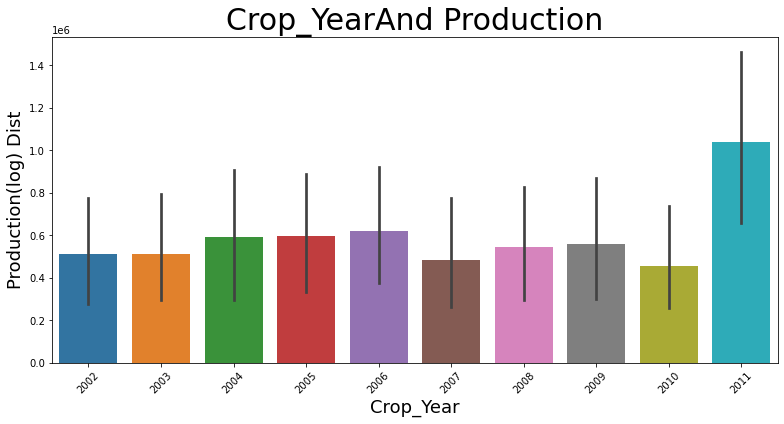

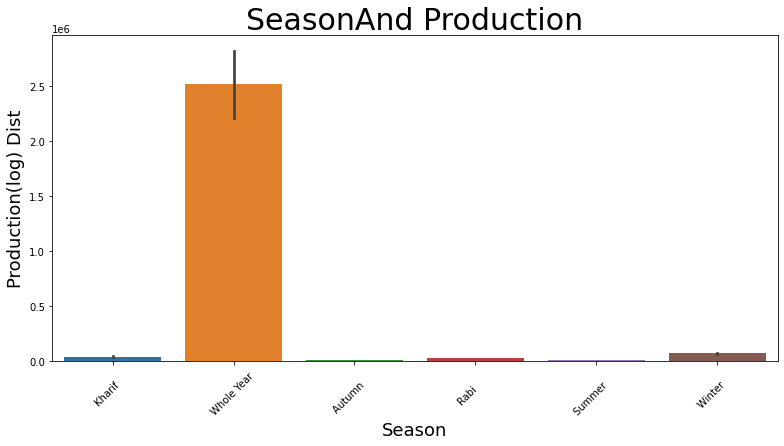

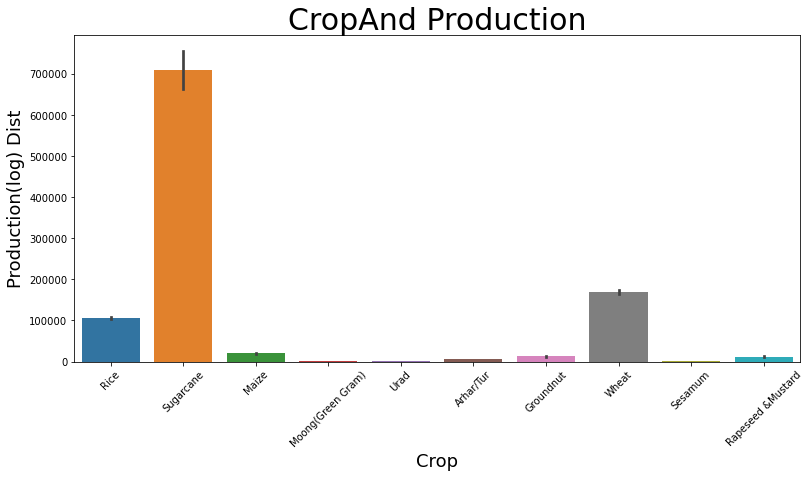

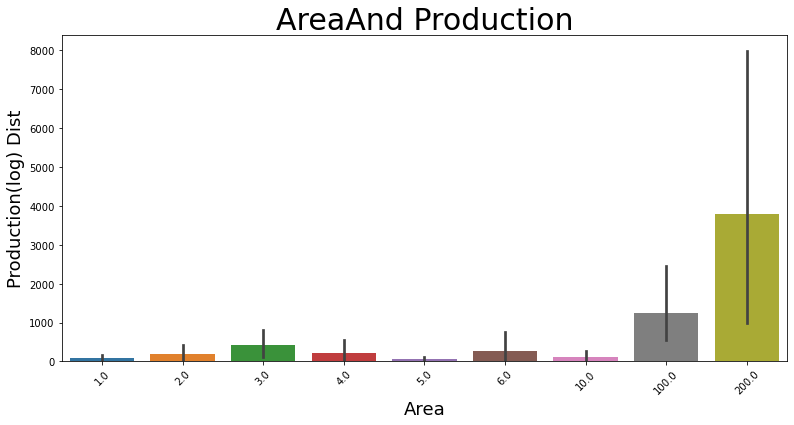

In [16]:
data["Production"] = data["Production"].astype('float')

for col in data.columns[:6]:
  plt.figure(figsize=(13,6)) #figure size
  #It's another way to plot our data. using a variable that contains the plot parameters
  g1 = sns.barplot(x=col, y='Production',data=data[(data[col].isin((data[col].value_counts()[:10].index.values))) & data['Production'] > 0])
  g1.set_title(col+'And Production', fontsize=30) # title and fontsize
  g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
  g1.set_xlabel(col, fontsize=18) # Xlabel
  g1.set_ylabel('Production(log) Dist', fontsize=18) #Ylabel
  plt.show()

In [17]:
data.corr()


,Crop_Year,Area,Production
Crop_Year,1.000000,-0.026022,0.006827
Area,-0.026022,1.000000,0.040655
Production,0.006827,0.040655,1.000000


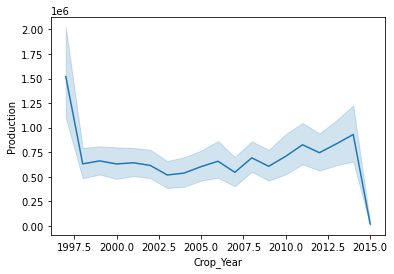

In [19]:

crop_sugarcane = data[data['Crop'] == 'Sugarcane'].sort_values(by='Production', ascending=False)
sns.lineplot(x='Crop_Year', y='Production', data=crop_sugarcane)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

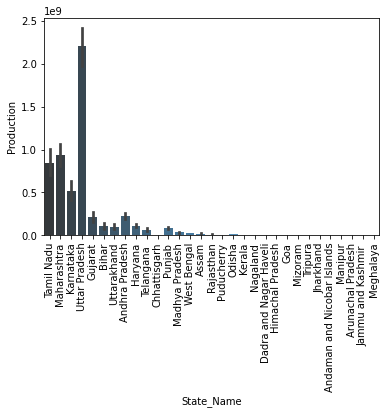

In [20]:
sns.barplot(x='State_Name', y='Production', palette='Blues_d',
            data=crop_sugarcane, estimator=sum)
plt.xticks(rotation=90)

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5]),
 <a list of 10 Text major ticklabel objects>)

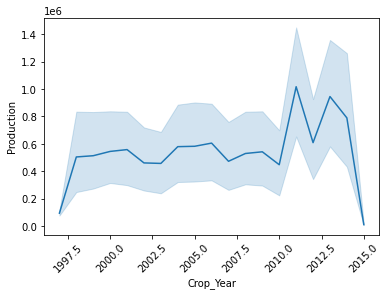

In [23]:
sns.lineplot(x='Crop_Year', y='Production', data=data)
plt.xticks(rotation=45)

In [26]:
#Résultats pour la production de cnne à sucre
sugarcane = data[data['Crop'] == 'Sugarcane']
sugarcane

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75
...,...,...,...,...,...,...,...
245953,West Bengal,PURULIA,2010,Whole Year,Sugarcane,303.0,11541.00
245984,West Bengal,PURULIA,2011,Whole Year,Sugarcane,303.0,20264.00
246016,West Bengal,PURULIA,2012,Whole Year,Sugarcane,314.0,11199.00
246051,West Bengal,PURULIA,2013,Whole Year,Sugarcane,161.0,7948.00


In [27]:
sugarcane.corr()

,Crop_Year,Area,Production
Crop_Year,1.000000,0.021179,-0.001384
Area,0.021179,1.000000,0.887683
Production,-0.001384,0.887683,1.000000


In [37]:
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
sugarcane_dummies = pd.get_dummies(sugarcane)
x_sugarcane = sugarcane_dummies.drop('Production', axis=1)
y_sugarcane = sugarcane_dummies['Production']
x_train_sugar, x_test_sugar, y_train_sugar, y_test_sugar = train_test_split(x_sugarcane,y_sugarcane,test_size=0.3, random_state=101)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

model=LinearRegression()   #build linear regression model
model.fit(x_train_sugar,y_train_sugar)  #fitting the training data
predicted=model.predict(x_test_sugar) #testing our model’s performance
print("MSE usinglinear regression", mean_squared_error(y_test_sugar,predicted))
print("R squared usinglinear regression", metrics.r2_score(y_test_sugar,predicted))

MSE 457047561794.71
R squared 0.88561901139888


In [44]:
import numpy as np
data.groupby("Season",axis=0).agg({"Production":np.sum})

,Production
Season,
Autumn,6.441377e+07
Kharif,4.029970e+09
Rabi,2.051688e+09
Summer,1.706579e+08
Whole Year,1.344248e+11
Winter,4.345498e+08


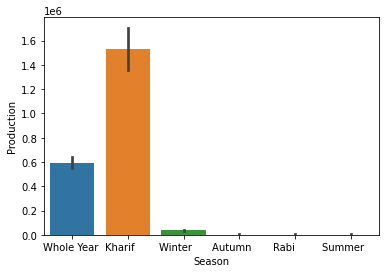

In [45]:
sns.barplot("Season","Production",data=crop_sugarcane)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model = RandomForestRegressor()
model.fit(x_train_sugar,y_train_sugar)
preds = model.predict(x_test_sugar)

r = r2_score(y_test_sugar,preds)
print("R2score using Randomn forest is ",r)



R2score using Randomn forest is  0.9524951147924121
